### Data 1 
https://archive.ics.uci.edu/dataset/31/covertype

In [18]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from mlrose_hiive import DiscreteOpt, RHCRunner, SARunner, GARunner, MIMICRunner
import mlrose_hiive
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time 

In [19]:
data = pd.read_csv("covtype.data", header= None)
data = data[data[54] < 3]
data = data.dropna(how='any',axis=0)

X = data.iloc[:50,:-1]
y = data.iloc[:50,-1:]



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
def fitness_function(params):
   
    C = [0.1, 1, 10][int(params[0])]  
    gamma = [0.0001, 0.001, 0.01, 0.1, 1][params[1]] 
   
    svm = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  

In [22]:
problem = DiscreteOpt(length=2, fitness_fn=mlrose_hiive.CustomFitness(fitness_function),
                      maximize=True, max_val=2)


### Randomized Hill Climbing

In [23]:
RHC =[]
for size in range(10,100,10):
    st_time=time.time()
    RHC_curve = mlrose_hiive.random_hill_climb(problem,restarts=10*size,max_attempts=10,max_iters=size*10,init_state=None,curve=True)
    et_time=time.time()
    RHC.append([size,et_time-st_time,RHC_curve[2][-1,0],RHC_curve[2][-1,1],RHC_curve[2][-1,1]/(et_time-st_time),RHC_curve[0],RHC_curve[1]])


### Simulated Annealing

In [24]:
SA =[]
for size in range(10,100,10):
    st_time=time.time()
    SA_curve = mlrose_hiive.simulated_annealing(problem,schedule=mlrose_hiive.GeomDecay(),max_attempts=10,init_state=None,max_iters=size*10,curve=True)
    et_time=time.time()
    SA.append([size,et_time-st_time,SA_curve[2][-1,0],SA_curve[2][-1,1],SA_curve[2][-1,1]/(et_time-st_time),SA_curve[0],SA_curve[1]])

### Genetic Algorithm

In [26]:
GA =[]
for size in range(10,100,10):
    st_time=time.time()
    GA_curve = mlrose_hiive.genetic_alg(problem,pop_size=10*size,mutation_prob=0.4,max_attempts=10,max_iters=size*10,curve=True)
    et_time=time.time()
    GA.append([size,et_time-st_time,GA_curve[2][-1,0],GA_curve[2][-1,1],GA_curve[2][-1,1]/(et_time-st_time),GA_curve[0],GA_curve[1]])
    
    

### MIMIC

In [27]:
MIMIC=[]
fitness = mlrose_hiive.FourPeaks(t_pct=.5)
problem_fit = mlrose_hiive.DiscreteOpt(length = size,fitness_fn = fitness,maximize = True,max_val = 2)
    
for size in range(10,100,10):
    st_time=time.time()
    MIMIC_curve = mlrose_hiive.mimic(problem_fit,pop_size=10*size, keep_pct=0.2,max_attempts=10,max_iters=size*10,curve=True)
    et_time=time.time()
    MIMIC.append([size,et_time-st_time,MIMIC_curve[2][-1,0],MIMIC_curve[2][-1,1],MIMIC_curve[2][-1,1]/(et_time-st_time), MIMIC_curve[0],MIMIC_curve[1]])

### Printing param

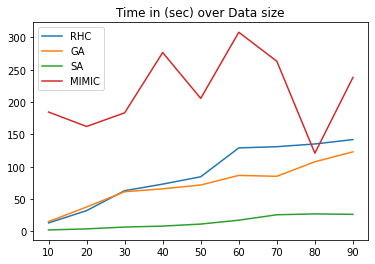

In [28]:

RHC_df = pd.DataFrame(RHC)[1]
GA_df = pd.DataFrame(GA)[1]
SA_df = pd.DataFrame(SA)[1]
M_df = pd.DataFrame(MIMIC)[1]
df = pd.concat([RHC_df,GA_df,SA_df, M_df], ignore_index=True, axis=1)
df.index=range(10,100,10)
df.columns = ["RHC","GA","SA", "MIMIC"]
df.plot(title="Time in (sec) over Data size")

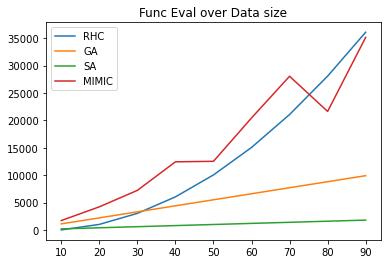

In [29]:

RHC_df = pd.DataFrame(RHC)[3]
GA_df = pd.DataFrame(GA)[3]
SA_df = pd.DataFrame(SA)[3]
M_df = pd.DataFrame(MIMIC)[3]
df = pd.concat([RHC_df,GA_df,SA_df, M_df], ignore_index=True, axis=1)
df.index=range(10,100,10)
df.columns = ["RHC","GA","SA", "MIMIC"]
df.plot(title="Func Eval over Data size")

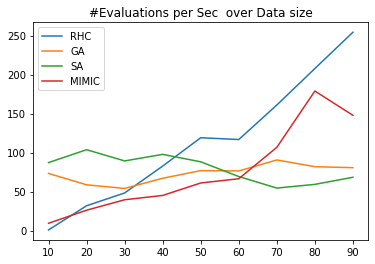

In [30]:

RHC_df = pd.DataFrame(RHC)[4]
GA_df = pd.DataFrame(GA)[4]
SA_df = pd.DataFrame(SA)[4]
M_df = pd.DataFrame(MIMIC)[4]
df = pd.concat([RHC_df,GA_df,SA_df, M_df], ignore_index=True, axis=1)
df.index=range(10,100,10)
df.columns = ["RHC","GA","SA", "MIMIC"]
df.plot(title="#Evaluations per Sec  over Data size")

In [31]:
print("Best features ")

print(("............."))

print("best state RHC: ")
print(pd.DataFrame(RHC)[5][0])
print("best feature RHC: ")
print(pd.DataFrame(RHC)[6][0])

print("best state GA: ")
print(pd.DataFrame(GA)[5][0])
print("best feature GA: ")
print(pd.DataFrame(GA)[6][0])

print("best state SA: ")
print(pd.DataFrame(SA)[5][0])
print("best feature SA: ")
print(pd.DataFrame(SA)[6][0])

print("best state MIMIC: ")
print(pd.DataFrame(MIMIC)[5][0])
print("best feature MIMIC: ")
print(pd.DataFrame(MIMIC)[6][0])



Best features 
.............
best state RHC: 
[1 0]
best feature RHC: 
-0.5
best state GA: 
[0 1]
best feature GA: 
-0.5
best state SA: 
[0 0]
best feature SA: 
-0.5
best state MIMIC: 
[1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
best feature MIMIC: 
14.0
